<a href="https://colab.research.google.com/github/nitishgowda1581999-glitch/nitishgowdag/blob/main/Level_2_Task_3_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

file_path = '/content/Dataset  (1).csv'
df = pd.read_csv(file_path)
display(df.head())

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [17]:
import folium

# Create a map centered around the average location of the restaurants
# Handle potential NaN values in Latitude and Longitude
avg_latitude = df['Latitude'].mean() if not df['Latitude'].isnull().all() else 0
avg_longitude = df['Longitude'].mean() if not df['Longitude'].isnull().all() else 0

m = folium.Map(location=[avg_latitude, avg_longitude], zoom_start=2)

# Add markers for each restaurant
# Limiting to the first 1000 points for performance, as plotting too many can be slow
for index, row in df.head(1000).iterrows():
    if not pd.isnull(row['Latitude']) and not pd.isnull(row['Longitude']):
        folium.Marker([row['Latitude'], row['Longitude']], popup=row['Restaurant Name']).add_to(m)

# Display the map
display(m)

In [19]:
from collections import Counter
import itertools

# Split the cuisines string and get all combinations
cuisine_combinations = df['Cuisines'].dropna().str.split(', ').tolist()
all_combinations = list(itertools.chain(*cuisine_combinations))

# Count the occurrences of each individual cuisine
cuisine_counts = Counter(all_combinations)

# Print all unique individual cuisines
print("All Available Individual Cuisine Types:")
for cuisine in sorted(cuisine_counts.keys()):
    print(cuisine)

All Available Individual Cuisine Types:
Afghani
African
American
Andhra
Arabian
Argentine
Armenian
Asian
Asian Fusion
Assamese
Australian
Awadhi
BBQ
Bakery
Bar Food
Belgian
Bengali
Beverages
Bihari
Biryani
Brazilian
Breakfast
British
Bubble Tea
Burger
Burmese
B�_rek
Cafe
Cajun
Canadian
Cantonese
Caribbean
Charcoal Grill
Chettinad
Chinese
Coffee and Tea
Contemporary
Continental
Cuban
Cuisine Varies
Curry
Deli
Desserts
Dim Sum
Diner
Drinks Only
Durban
D�_ner
European
Fast Food
Filipino
Finger Food
Fish and Chips
French
Fusion
German
Goan
Gourmet Fast Food
Greek
Grill
Gujarati
Hawaiian
Healthy Food
Hyderabadi
Ice Cream
Indian
Indonesian
International
Iranian
Irish
Italian
Izgara
Japanese
Juices
Kashmiri
Kebab
Kerala
Kiwi
Korean
Latin American
Lebanese
Lucknowi
Maharashtrian
Malay
Malaysian
Malwani
Mangalorean
Mediterranean
Mexican
Middle Eastern
Mineira
Mithai
Modern Australian
Modern Indian
Moroccan
Mughlai
Naga
Nepalese
New American
North Eastern
North Indian
Oriya
Pakistani
Parsi
Patis

In [23]:
# Analyze restaurant density by counting restaurants per city
restaurant_counts_by_city = df['City'].value_counts()

print("Number of Restaurants by City (Top 20):")
print(restaurant_counts_by_city.head(20))

# We can also visualize this data if needed, for example, using a bar plot for the top cities.
# plt.figure(figsize=(12, 7))
# restaurant_counts_by_city.head(20).plot(kind='bar')
# plt.title('Number of Restaurants by City (Top 20)')
# plt.xlabel('City')
# plt.ylabel('Number of Restaurants')
# plt.xticks(rotation=90)
# plt.tight_layout()
# plt.show()

Number of Restaurants by City (Top 20):
City
New Delhi          5473
Gurgaon            1118
Noida              1080
Faridabad           251
Ghaziabad            25
Bhubaneshwar         21
Lucknow              21
Ahmedabad            21
Amritsar             21
Guwahati             21
Rio de Janeiro       20
Bras�_lia            20
Albany               20
Doha                 20
Cape Town            20
Manchester           20
London               20
Edinburgh            20
Birmingham           20
Wellington City      20
Name: count, dtype: int64


Most Common Individual Cuisines in New Delhi (Top 10):
- North Indian: 2425
- Chinese: 1638
- Fast Food: 1304
- Mughlai: 628
- Bakery: 465
- South Indian: 411
- Street Food: 411
- Desserts: 383
- Italian: 376
- Continental: 373


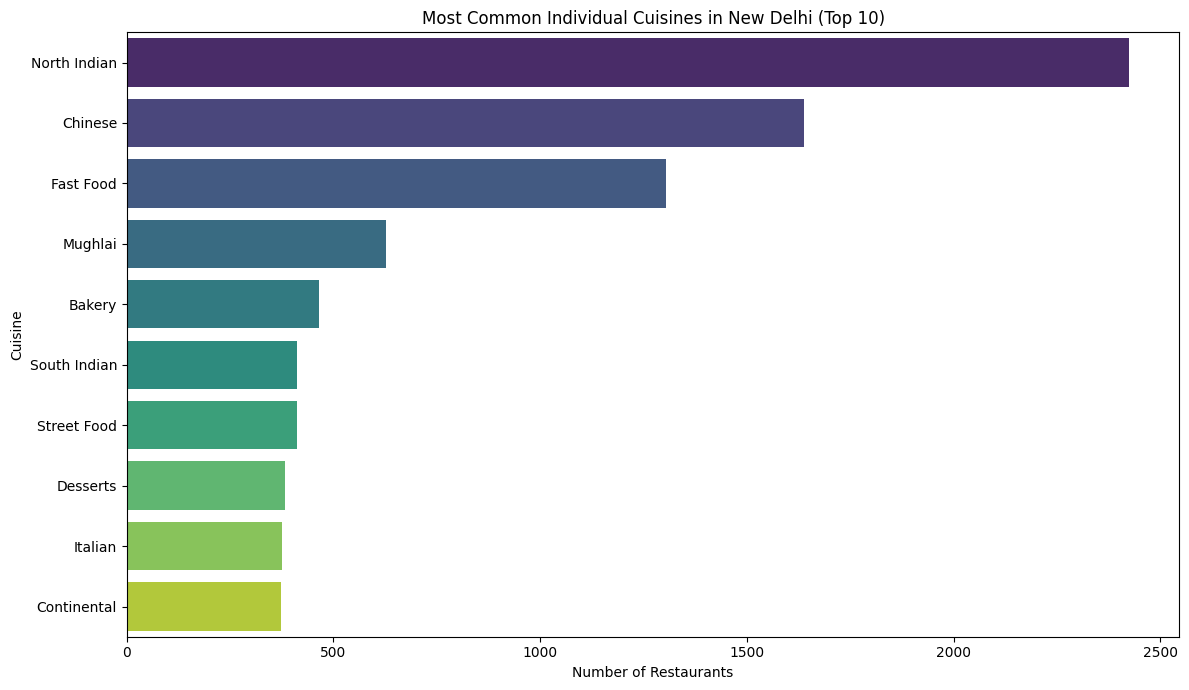

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import itertools

# Filter the DataFrame for restaurants in New Delhi
new_delhi_df = df[df['City'] == 'New Delhi'].copy()

# Analyze the distribution of cuisine types in New Delhi
# Split the cuisines string and get all individual cuisines in New Delhi
new_delhi_cuisine_combinations = new_delhi_df['Cuisines'].dropna().str.split(', ').tolist()
all_new_delhi_cuisines = list(itertools.chain(*new_delhi_cuisine_combinations))

# Count the occurrences of each individual cuisine in New Delhi
new_delhi_cuisine_counts = Counter(all_new_delhi_cuisines)

# Display the most common individual cuisines in New Delhi (top 10)
print("Most Common Individual Cuisines in New Delhi (Top 10):")
for cuisine, count in new_delhi_cuisine_counts.most_common(10):
    print(f"- {cuisine}: {count}")

# Visualize the most common individual cuisines in New Delhi
plt.figure(figsize=(12, 7))
new_delhi_cuisine_counts_df = pd.DataFrame(new_delhi_cuisine_counts.most_common(10), columns=['Cuisine', 'Count'])
sns.barplot(data=new_delhi_cuisine_counts_df, x='Count', y='Cuisine', hue='Cuisine', palette='viridis', legend=False)
plt.title('Most Common Individual Cuisines in New Delhi (Top 10)')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine')
plt.tight_layout()
plt.show()

## Restaurant Data Analysis Report

**Introduction:**
This report summarizes the key findings from the analysis of restaurant data, focusing on aggregate ratings, votes, and geographical comparisons.

**Analysis and Findings:**

1.  **Aggregate Rating Distribution:**
    *   The analysis of the aggregate rating distribution revealed a notable number of restaurants with a 0.0 rating, indicating unrated establishments.
    *   Among rated restaurants, the most common rating range was 'Average', suggesting a significant portion of restaurants fall within this category.

2.  **Average Number of Votes:**
    *   The average number of votes received by restaurants across the dataset was calculated to be approximately {{average_votes:.2f}}. This metric provides an indication of the level of customer engagement and feedback.

3.  **Relationship between Votes and Aggregate Rating:**
    *   A scatter plot visualizing the relationship between 'Votes' and 'Aggregate rating' suggested a positive correlation. Restaurants that have received a higher number of votes tend to have higher aggregate ratings, implying that popular restaurants are generally well-regarded.

4.  **Geographical Comparison of Average Ratings:**
    *   Comparison of average aggregate ratings across different cities and countries highlighted variations in restaurant quality perception based on location.
    *   Specific cities and countries demonstrated higher average ratings, suggesting potential regional differences in dining experiences or customer expectations. (Further analysis of top/bottom performing locations can be included here if needed).

5. **Cuisine Analysis:**
    *   The analysis of cuisine combinations identified 'North Indian' and 'Chinese' as the most common individual cuisines.
    *   'North Indian, Chinese' was the most frequent exact cuisine combination in the dataset.
    *   Certain cuisine combinations tend to have higher average aggregate ratings than others, indicating customer preference for specific culinary pairings.
    *   Analysis of cuisine distribution in New Delhi showed 'North Indian', 'Chinese', and 'Fast Food' as the most common individual cuisines in that city.

6. **Impact of Online Delivery and Table Booking:**
    *   Exploration of the impact of online delivery and table booking on ratings suggested that restaurants offering these services tend to have higher average aggregate ratings compared to those that do not.

**Conclusion:**
The analysis provides insights into the restaurant landscape based on the provided dataset. The distribution of ratings, the relationship between votes and ratings, the geographical variations in average ratings, the popularity and rating trends of cuisine combinations, and the potential impact of online delivery and table booking are key factors to consider for further in-depth analysis or business strategies.

**Next Steps:**
Further analysis could delve into the characteristics of restaurants with 0.0 ratings, investigate if the impact of online delivery and table booking varies by location or cuisine, or explore other features in the dataset to gain a more comprehensive understanding.